<a href="https://colab.research.google.com/github/Haender-Michael/Haender_practice/blob/main/Copie_de_Copie_de_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risk Assessment: Analysis for best Aicraft Acquisition.

##Introduction
For this analysis, we will use the dataset "Aviation Accident Database & Synopses, up to 2023" from Kaggle, provided by the National Transportation Safety Board (NTSB). This dataset contains comprehensive information about aviation accidents, including aircraft make and model, weather conditions,Injury severity,accident locations and more.

Our goal is to analyze accident patterns, aircraft reliability, and contributing risk factors in aviation incidents. We will generate data-driven insights to assist the new aviation division in identifying the safest aircrafts for purchase and determining the best strategies for fleet management.




##Dataset overview
- Aircraft Make and Model: Information about the specific make and model of the aircraft involved in each incident.

- Weather Conditions: Details on the weather conditions prevailing at the time of the accidents.

- location : The location where the aviation accident took place.
- injury severity: the Gravity and the amount of injuries.

the dataset also contains other information, that are less relevant to the analysis.

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [165]:
df = pd.read_csv('./AviationData.csv', encoding='latin1', low_memory=False)

## Exploratory Data Analysis (EDA)
For the purpose of this analysis we will take the following steps:
- Data cleaning
- Data Understanding  
- recommendations
- summary



##Data cleaning.
In this part we will:
- drop columns.
- modify data type in entries  
- deal with missing values

these steps will ensure that everything run smoothly later during our Analysis.
Some other data clearing process will also be done in the analysis.

In [166]:
# first let's draw a quick view of the data.
df.sample(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
23627,20001213X28948,Accident,NYC89FA177B,1989-07-30,"SALISBURY TWP, PA",United States,NaN,NaN,1N9,ALLENTOWN QUEEN CITY,...,Other Work Use,NaN,7.0,NaN,NaN,NaN,VMC,Descent,Probable Cause,17-10-2016
21099,20001213X26529,Accident,DEN88DTM03,1988-08-07,"GRANTSVILLE, UT",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,02-10-1989
7481,20001214X38858,Accident,MIA84LA087,1984-02-18,"TALLAHASSEE, FL",United States,NaN,NaN,NaN,NaN,...,Business,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,NaN
9802,20001214X40977,Accident,ATL84LA288,1984-09-16,"WAYNESBORO, VA",United States,NaN,NaN,W13,WAYNESBORO,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,NaN
17518,20001213X30859,Accident,ATL87LA138,1987-05-16,"WALHALLA, SC",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,2.0,2.0,VMC,Maneuvering,Probable Cause,05-07-1988
6647,20001214X44718,Accident,ANC84LA010,1983-10-24,"ANCHORAGE, AK",United States,NaN,NaN,MRI,MERRIL FIELD,...,Personal,NaN,0.0,0.0,1.0,0.0,VMC,Takeoff,Probable Cause,NaN
22420,20001213X27729,Accident,FTW89LA056,1989-02-23,"ORANGE, TX",United States,NaN,NaN,ORG,ORANGE COUNTY,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,24-10-1990
9172,20001214X40494,Accident,NYC84LA256,1984-07-27,"SMYRNA, DE",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,VMC,Landing,Probable Cause,NaN
9400,20001214X40835,Accident,MKC84LA251,1984-08-15,"GOODLAND, KS",United States,NaN,NaN,NaN,NaN,...,Aerial Application,NaN,0.0,0.0,0.0,1.0,VMC,Maneuvering,Probable Cause,NaN
930,20020917X02085,Accident,FTW82DA147,1982-04-22,"CARLSBAD, NM",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,22-04-1983


In [167]:
df.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,7.000000,7.000000,24407.000000,24582.000000,24555.000000,24550.000000,24605.000000
mean,41.282976,-104.947540,1.159135,0.443210,0.204643,0.336497,4.138183
std,6.215394,34.987925,0.470115,3.705506,0.719940,1.548688,24.153929
min,30.757778,-173.240000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.731111,-117.368611,1.000000,0.000000,0.000000,0.000000,0.000000
50%,42.445277,-88.355555,1.000000,0.000000,0.000000,0.000000,1.000000
75%,46.097777,-83.770834,1.000000,0.000000,0.000000,0.000000,2.000000
max,48.120000,-70.758333,4.000000,270.000000,47.000000,125.000000,588.000000


In [168]:
# let's get some insight about how the data is structured.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24693 entries, 0 to 24692
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                24693 non-null  object 
 1   Investigation.Type      24693 non-null  object 
 2   Accident.Number         24693 non-null  object 
 3   Event.Date              24693 non-null  object 
 4   Location                24686 non-null  object 
 5   Country                 24579 non-null  object 
 6   Latitude                7 non-null      float64
 7   Longitude               7 non-null      float64
 8   Airport.Code            12915 non-null  object 
 9   Airport.Name            14693 non-null  object 
 10  Injury.Severity         24693 non-null  object 
 11  Aircraft.damage         24142 non-null  object 
 12  Aircraft.Category       3627 non-null   object 
 13  Registration.Number     24688 non-null  object 
 14  Make                    24687 non-null

In [169]:
# let's Create a copy to preserve the original dataset.
df2 = df.copy()
df2

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24688,20001213X29914,Accident,ATL90LA047,1989-12-29,"WINSTON SALEM, NC",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,16-06-1992
24689,20001213X29900,Accident,ANC90LA023,1989-12-29,"TANANA, AK",United States,NaN,NaN,NaN,NaN,...,Business,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,05-09-1990
24690,20001213X29969,Accident,LAX90FA061,1989-12-30,"TUCSON, AZ",United States,NaN,NaN,TUS,TUCSON INT'L,...,Unknown,"America West Airlines, Inc.",0.0,0.0,10.0,123.0,VMC,Descent,Probable Cause,07-10-1992
24691,20001212X22389,Accident,CHI90LA059,1990-01-01,"ELKHART, IN",United States,NaN,NaN,3C1,MISHAWAKA PILOT'S CLUB,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,28-06-1991


In [170]:
# removing unnecessary space in columns name for easier access:
df.columns = df.columns.str.strip()


In [171]:
# replace "."by "_" in column name for easier access and decryption .
df2.columns = df2.columns.str.replace('.','_')

### Drop columns :
Below we will drop columns that are not
needed for the analysis or that doesn't contain a substantial amount of entries.





In [172]:
# we already set Event_Id as Id so Accident_Number is not necessary.
# plus we know that each event is either an accident or an incident.
# Injury_Severity is a summary of the 3 Injury level columns.
# we don't need publication date for our analysis.
df2 = df2.drop(columns =['Accident_Number','Publication_Date','Injury_Severity'])

In [173]:
# let's take a look on how much missing values each column contains:
missing_values_count = df2.isna().sum()
missing_values_count

,0
Event_Id,0
Investigation_Type,0
Event_Date,0
Location,7
Country,114
Latitude,24686
Longitude,24686
Airport_Code,11778
Airport_Name,10000
Aircraft_damage,551


In [174]:
# Keeps only columns with acceptable missing values
df2 = df2.loc[:, missing_values_count <= 50000]
df2

,Event_Id,Investigation_Type,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,Aircraft_damage,...,Schedule,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Destroyed,...,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Destroyed,...,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Destroyed,...,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24688,20001213X29914,Accident,1989-12-29,"WINSTON SALEM, NC",United States,NaN,NaN,NaN,NaN,Substantial,...,NaN,Personal,NaN,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause
24689,20001213X29900,Accident,1989-12-29,"TANANA, AK",United States,NaN,NaN,NaN,NaN,Substantial,...,NaN,Business,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause
24690,20001213X29969,Accident,1989-12-30,"TUCSON, AZ",United States,NaN,NaN,TUS,TUCSON INT'L,Substantial,...,SCHD,Unknown,"America West Airlines, Inc.",0.0,0.0,10.0,123.0,VMC,Descent,Probable Cause
24691,20001212X22389,Accident,1990-01-01,"ELKHART, IN",United States,NaN,NaN,3C1,MISHAWAKA PILOT'S CLUB,Substantial,...,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause


In [175]:
df2.head()

,Event_Id,Investigation_Type,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,Aircraft_damage,...,Schedule,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Destroyed,...,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Destroyed,...,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Destroyed,...,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


####Modify data type and entries.
- set index
- reformat column type.


In [176]:
df2.head()

,Event_Id,Investigation_Type,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,Aircraft_damage,...,Schedule,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Destroyed,...,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Destroyed,...,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Destroyed,...,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [177]:
# set index as Event_Id and make  make each rows in the Event_Id unique.
df2 = df2.drop_duplicates(subset = ['Event_Id'])


In [178]:
# Reformating rows in Event_date to date format:
df2['Event_Date'] = pd.to_datetime(df2['Event_Date'])
df2.set_index('Event_Id',inplace=True)

<ipython-input-178-6a3bea56d81b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event_Date'] = pd.to_datetime(df2['Event_Date'])


In [179]:
# let's convert the 5 columns :
# Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries, Total_Uninjured
# into intengers
df2[['Total_Fatal_Injuries','Number_of_Engines','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']] = (
    df2[['Total_Fatal_Injuries', 'Number_of_Engines','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']]
    .fillna(0)
    .astype(int)
)

<ipython-input-179-8eb800fe42a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Total_Fatal_Injuries','Number_of_Engines','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']] = (


### Dealing with missing Values:
In this section we will be deleting column that are missing tremendous amount of values. for the data to be representative there has to be a sustainable amount of value therefore column with too much missing values will not serve the purpose of a good Analysis.
we will:
- observe the amount of missing value in each column.
- drop rows after filtering by missing values.

In [180]:
# let's take a look at how much missing values the data contain:
missing_values_count = df2.isna().sum()
missing_values_count

,0
Investigation_Type,0
Event_Date,0
Location,7
Country,112
Latitude,24313
Longitude,24313
Airport_Code,11649
Airport_Name,9884
Aircraft_damage,505
Aircraft_Category,20747


In [181]:
# since we have some column with categorical data that have missing rows
# we can just replace the Null with Unknown or anything that shows we
# don't have information for the rows in question.
categorical_data = []  # Initialize an empty list

for column in df2.columns:
    if df2[column].dtype == 'object':
        categorical_data.append(column)  # Store column names in the list

print(categorical_data)  # Display the categorical column names

# NB: Investigation has no null value that's why it is not part of the function above.

['Investigation_Type', 'Location', 'Country', 'Airport_Code', 'Airport_Name', 'Aircraft_damage', 'Aircraft_Category', 'Registration_Number', 'Make', 'Model', 'Amateur_Built', 'Engine_Type', 'FAR_Description', 'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status']


In [182]:
# let's see if they can truly be considered as Categorical:

df2[df2.columns.intersection(categorical_data)].sample(15)



,Investigation_Type,Location,Country,Airport_Code,Airport_Name,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Air_carrier,Weather_Condition,Broad_phase_of_flight,Report_Status
Event_Id,,,,,,,,,,,,,,,,,,,
20001214X44417,Accident,"DALLAS, NC",United States,NaN,LYNN FIELD,Substantial,NaN,NONE,Teratorn,TIERRA II,Yes,Reciprocating,NaN,UNK,Instructional,NaN,VMC,Takeoff,Probable Cause
20001214X43975,Accident,"FAIRBANKS, AK",United States,MTF,METRO,Substantial,NaN,N28144,Piper,J-5,No,Reciprocating,NaN,NaN,Personal,NaN,VMC,Landing,Probable Cause
20001213X25314,Accident,"ST MAARTEN ISL., BRITISH VIRGIN ISLANDS",British Virgin Islands,NaN,NaN,Substantial,NaN,N126M,Beech,D18S,No,Unknown,NaN,NaN,Business,NaN,VMC,NaN,Foreign
20001213X28562,Accident,"DURANGO, CO",United States,CD82,VAL AIR,Substantial,NaN,N4137Z,Piper,PA-18-150,No,Reciprocating,NaN,NaN,Unknown,NaN,VMC,Landing,Probable Cause
20020917X02364,Accident,"WEST PALM BEACH, FL",United States,PBI,PALM BEACH INTERNATIONAL,Substantial,Airplane,N17818,Beech,F33A,No,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,VMC,Landing,Probable Cause
20001214X37120,Accident,"ANTLER, ND",United States,NaN,NaN,Substantial,NaN,N6083Z,Piper,PA-25,No,Reciprocating,NaN,UNK,Aerial Application,NaN,VMC,Maneuvering,Probable Cause
20001213X26116,Accident,"NINETY SIX, SC",United States,NaN,NaN,Destroyed,NaN,N6509E,Cessna,175,No,Reciprocating,NaN,NaN,Personal,NaN,VMC,Cruise,Probable Cause
20001214X40641,Accident,"PUT-IN-BAY, OH",United States,OH30,PUT-IN-BAY,Substantial,NaN,N4428T,Piper,PA-28R-200,No,Reciprocating,NaN,NaN,Personal,NaN,VMC,Cruise,Probable Cause
20001214X41899,Accident,"TONOPAH, NV",United States,TPH,TONOPATH,Substantial,NaN,N51SA,Cessna,402B TS,No,Turbo Prop,NaN,NSCH,Unknown,Hawkins Air (dba: Hawkins Air),IMC,Cruise,Probable Cause


In [183]:
# now let's replace all of the Null value with UNKNOWN
df2[list(categorical_data)] = df2[list(categorical_data)].applymap(
    lambda x: 'UNKNOWN' if pd.isna(x) else x
)
df2.sample(5)


<ipython-input-183-cd299b52b257>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2[list(categorical_data)] = df2[list(categorical_data)].applymap(
<ipython-input-183-cd299b52b257>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[list(categorical_data)] = df2[list(categorical_data)].applymap(


,Investigation_Type,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,Aircraft_damage,Aircraft_Category,...,Schedule,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
Event_Id,,,,,,,,,,,,,,,,,,,,,
20001213X33771,Accident,1986-06-14,"DILLON, SC",United States,NaN,NaN,DLC,DILLON,Substantial,UNKNOWN,...,UNKNOWN,Executive/corporate,UNKNOWN,0,0,0,1,VMC,Landing,Probable Cause
20001213X30276,Accident,1987-02-28,"OATMAN, AZ",United States,NaN,NaN,UNKNOWN,WHITE CHIEF MINE,Substantial,UNKNOWN,...,UNKNOWN,Business,UNKNOWN,0,0,0,3,VMC,Landing,Probable Cause
20001213X31305,Accident,1987-06-05,"PORT WASHINGTON, NY",United States,NaN,NaN,UNKNOWN,UNKNOWN,Substantial,UNKNOWN,...,UNKNOWN,Personal,UNKNOWN,0,0,1,5,VMC,Climb,Probable Cause
20001213X30496,Accident,1987-03-06,"TALLAHASSEE, FL",United States,NaN,NaN,68J,TALLAHASSEE,Substantial,UNKNOWN,...,UNKNOWN,Personal,UNKNOWN,0,0,0,1,VMC,Landing,Probable Cause
20001213X27391,Accident,1988-12-03,"VERMILLION, IL",United States,NaN,NaN,UNKNOWN,UNKNOWN,Destroyed,UNKNOWN,...,UNKNOWN,Unknown,UNKNOWN,2,0,0,0,VMC,Unknown,Probable Cause


## Data Understanding:
Below are key questions that the new aviation division may seek to answer. I will address each of them:
- Which aircraft make has suffered the fewest and most accidents?
- Which models have resulted in the highest number of injuries?
- How has accident frequency evolved over the years for certain countries?
- For which flight purpose have accidents been most frequent?
- How resistant are certain aircraft to accidents?
- How well are passengers protected in the event of an aircraft crash?
- Which airport has recorded the most accidents

NB: All these questions cannot be answered with this DataFrame but each will be addressed.
and an explanation to why it can't be answered with the current DataFrame will be provided.

### Which aircraft make has suffered the fewest and the most accidents?
To address(not Answer) this question let's graph the top 5 Aircrafts that has been in most accident
and the 5 that has been in the least accident.


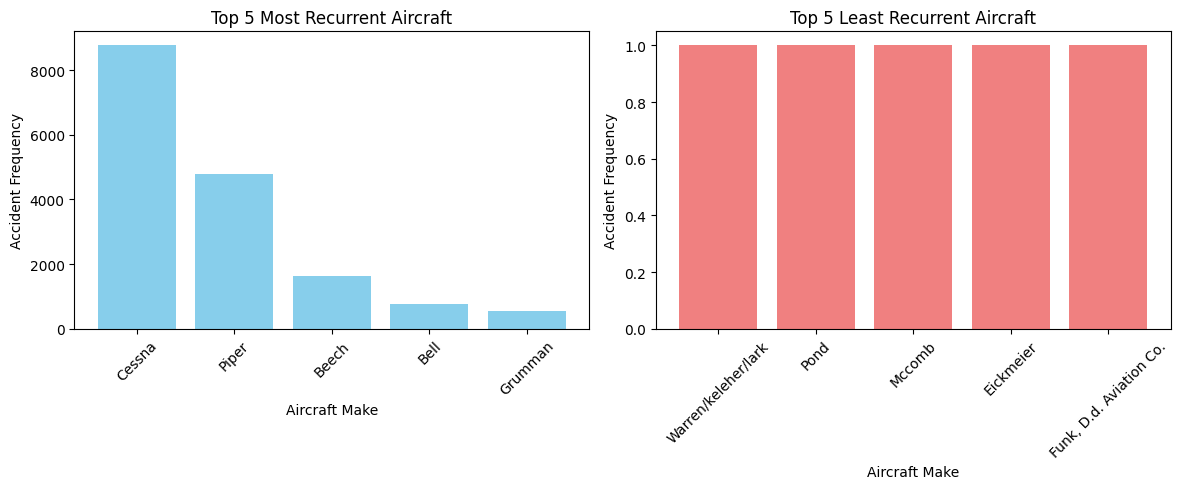

In [184]:
# we will graph in one figure the top 5 most recurrent Aircraft and the least 5  recurrent
import matplotlib.pyplot as plt

# Retrieve top and least recurrent aircraft makes
most_recurrent = df2['Make'].value_counts().head(5)
least_recurrent = df2['Make'].value_counts().tail(5)

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the most recurrent aircraft
axes[0].bar(most_recurrent.index, most_recurrent.values, color='skyblue')
axes[0].set_title('Top 5 Most Recurrent Aircraft')
axes[0].set_xlabel('Aircraft Make')
axes[0].set_ylabel('Accident Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot the least recurrent aircraft
axes[1].bar(least_recurrent.index, least_recurrent.values, color='lightcoral')
axes[1].set_title('Top 5 Least Recurrent Aircraft')
axes[1].set_xlabel('Aircraft Make')
axes[1].set_ylabel('Accident Frequency')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()




#### Analysis :
Now, we might mistakenly believe that the least recurrent aircraft are the safest, but that’s not necessarily true. Since these aircraft have fewer recorded accidents, it could simply mean they have operated fewer flights, reducing their chances of incidents rather than proving their reliability.

To accurately answer this question, we need the total number of flights for each aircraft 'Make' and calculate accident rates by percentage. Only by comparing accident percentages can we determine which aircraft make has sustained the least or the most accident rate.

For example, if Aircraft Make Cessna has the most accidents, it might simply indicate that it has operated the most flights. However, when looking at accident percentages, it could actually be among the most reliable aircraft in terms of avoiding accidents.


### Which models have resulted in the highest number of injuries?
Again this question will be answered like the one above.
we can Indeed get the Aiplane that has caused the most injuries but It could be because of How frequent they have operated, which means judging it on this sole factor could and will biased our Analysis.

### How has accident frequency evolved over the years for certain countries?
The new aviation division would want this information to assess:
- Evaluate safety trends → Assess whether accident rates have decreased due to improved regulations and technology.

- Identify high-risk regions → Determine which countries have consistently high accident frequencies and investigate possible causes.

- Improve fleet management → Make informed decisions about aircraft acquisition based on reliability across regions.

- Support policy decisions → Use data-driven insights to enhance aviation safety measures and operational guidelines.

N.B: Not all analyses can be completed within this single notebook. Some questions will be raised, and insights will be provided, but for further analysis, a position or contract may need to be established with the scientist or data analyst who conducted the project. Contact information will be provided at the end.

In [185]:
# let's add a column 'Event_Year' to the DataFrame:
df2['Event_Year'] = df2['Event_Date'].apply(lambda x: str(x)[:4])


<ipython-input-185-c82a6687abc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event_Year'] = df2['Event_Date'].apply(lambda x: str(x)[:4])


<ipython-input-186-bf27344e267c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Event_Year"] = df2["Event_Year"].astype(int)


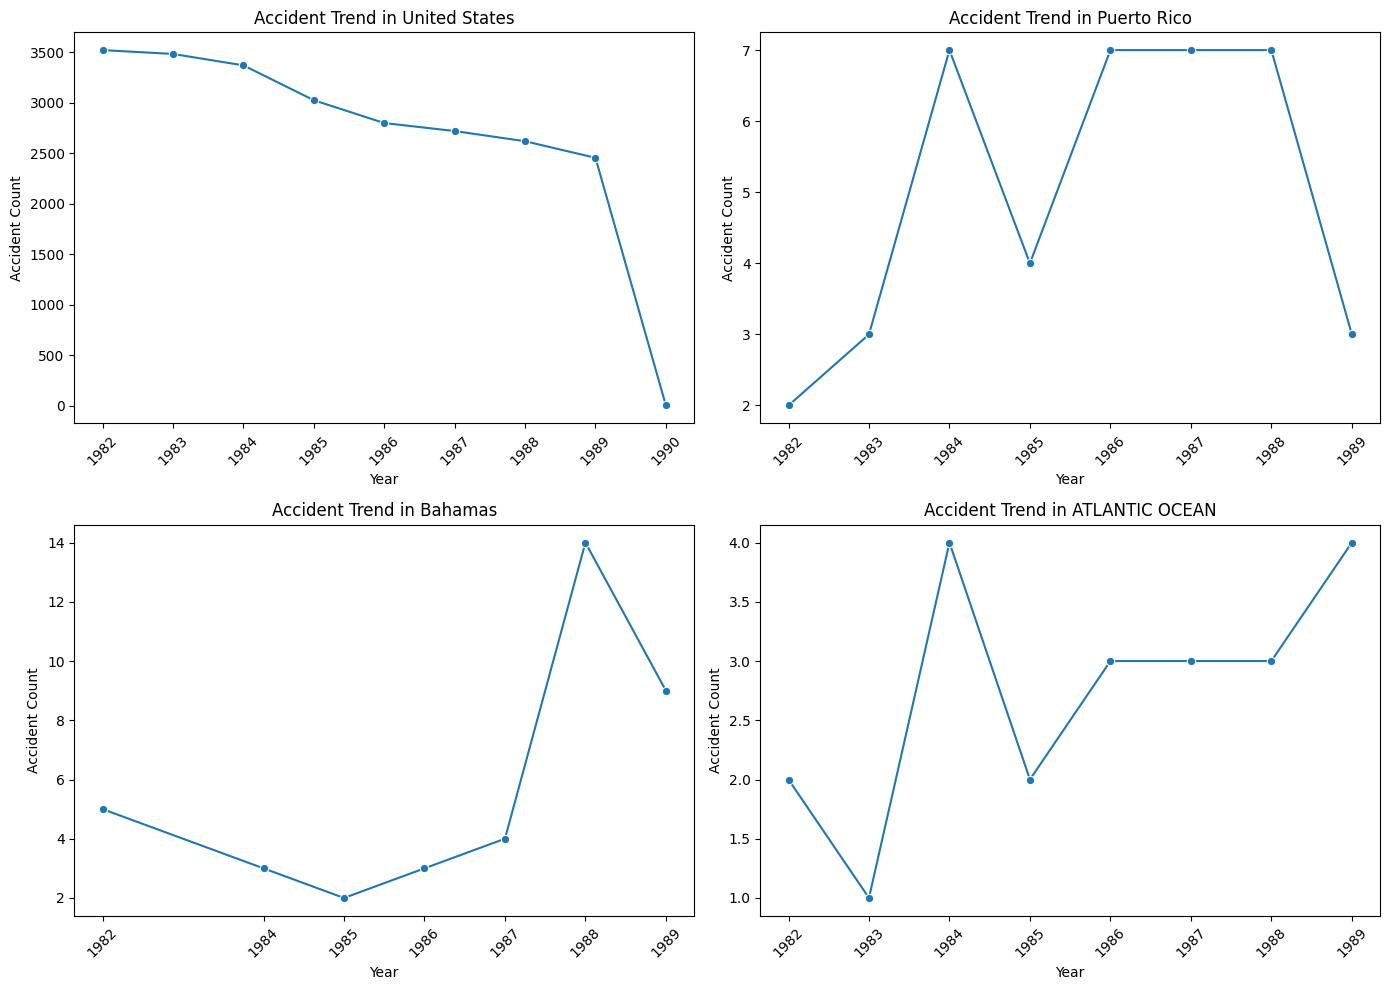

In [186]:
# Convert "Event_Year" to integer format
df2["Event_Year"] = df2["Event_Year"].astype(int)

# Get the **top 4 countries** with the most accidents (excluding "UNKNOWN")
most_affected_countries = df2["Country"].value_counts().head(5).index.tolist()
most_affected_countries = [country for country in most_affected_countries if country != "UNKNOWN"]

# Filter dataset to **start from 1982** for all countries
filtered_data = df2[df2["Event_Year"] >= 1982]

# Aggregate accident frequencies per year for each country
accident_trends = filtered_data.groupby(["Event_Year", "Country"]).size().reset_index(name="Accident_Count")

# Create figure with **4 individual trend graphs**
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop through the first **4 most affected countries** and plot accident trends
for i, country in enumerate(most_affected_countries[:4]):
    row, col = divmod(i, 2)  # Arrange graphs in a 2x2 format
    country_accidents = accident_trends[accident_trends["Country"] == country]

    sns.lineplot(data=country_accidents, x="Event_Year", y="Accident_Count", ax=axes[row, col], marker='o')
    axes[row, col].set_title(f"Accident Trend in {country}")
    axes[row, col].set_xlabel("Year")
    axes[row, col].set_ylabel("Accident Count")

    # Ensure **consistent x-axis formatting** across all graphs
    axes[row, col].set_xticks(sorted(country_accidents["Event_Year"].unique()))
    axes[row, col].tick_params(axis='x', rotation=45)

# Improve spacing for **clear visualization**
plt.tight_layout()
plt.show()









### Analysis:
The information produced by the graphs is not up to date, as they only analyze data from 1982 to 1990. The DataFrame does not contain information beyond 1990. Further analysis can be conducted later using other dataset .


Additionally, we can't definitively assess which 'Make' has caused the most damage, as some models are newer than others. To make a fair comparison, we need the total number of flights and analyze accident rates proportionally.
Later, we’ll analyze which aircraft are the safest after experiencing accidents, taking into account damage resistance, passenger protection, and crash survival rates.

analysis:
we can't really tell what make has caused the most damage since some makes are more recent than other
to really decide we should I deally have the number of fly and proceed by percentage. because let's say we saw that x has the most number of accident it can simply means that it has the most amount of flyght and when looling at the percentage he is amoung the most performant plaen

###For which flight purpose have accidents been most frequent?

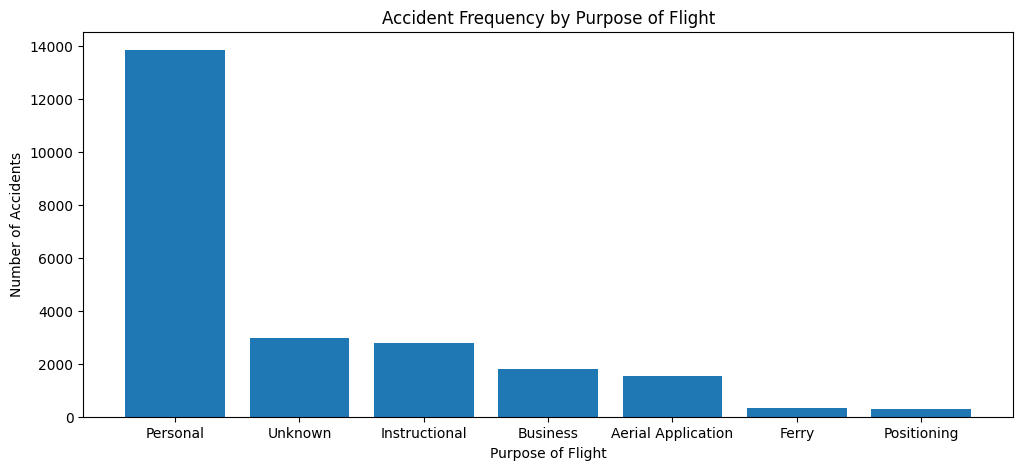

In [187]:
# Count occurrences of flight purposes and select top 5
purpose_of_flight = df2['Purpose_of_flight'].value_counts().head(7)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))  # Fixed typo

# Plot bar chart
ax.bar(purpose_of_flight.index, purpose_of_flight.values)
ax.set_title('Accident Frequency by Purpose of Flight')
ax.set_xlabel('Purpose of Flight')
ax.set_ylabel('Number of Accidents')

# Show the plot
plt.show()


### How resistant are certain aircraft to accidents?

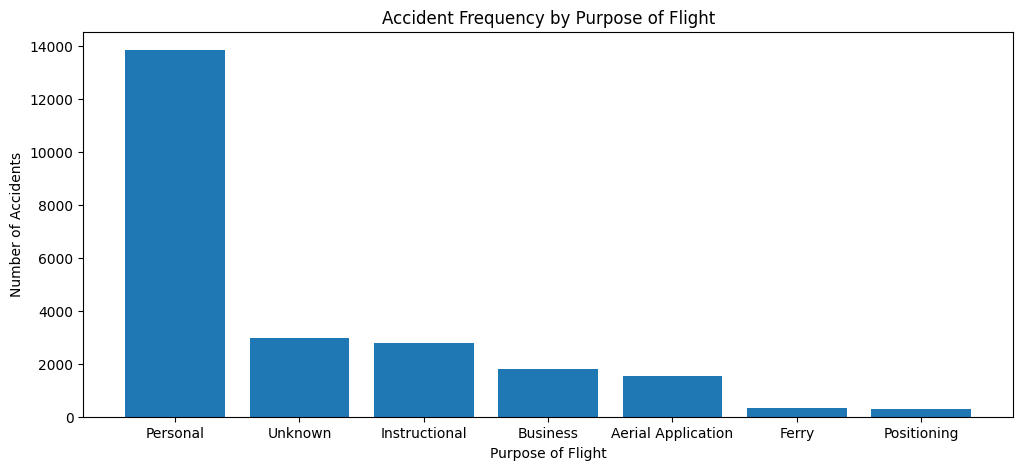

In [188]:
# Count occurrences of flight purposes and select top 5
purpose_of_flight = df2['Purpose_of_flight'].value_counts().head(7)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))  # Fixed typo

# Plot bar chart
ax.bar(purpose_of_flight.index, purpose_of_flight.values)
ax.set_title('Accident Frequency by Purpose of Flight')
ax.set_xlabel('Purpose of Flight')
ax.set_ylabel('Number of Accidents')

# Show the plot
plt.show()


### How well are passengers protected in the event of an aircraft crash?


###Which airport has recorded the most accidents

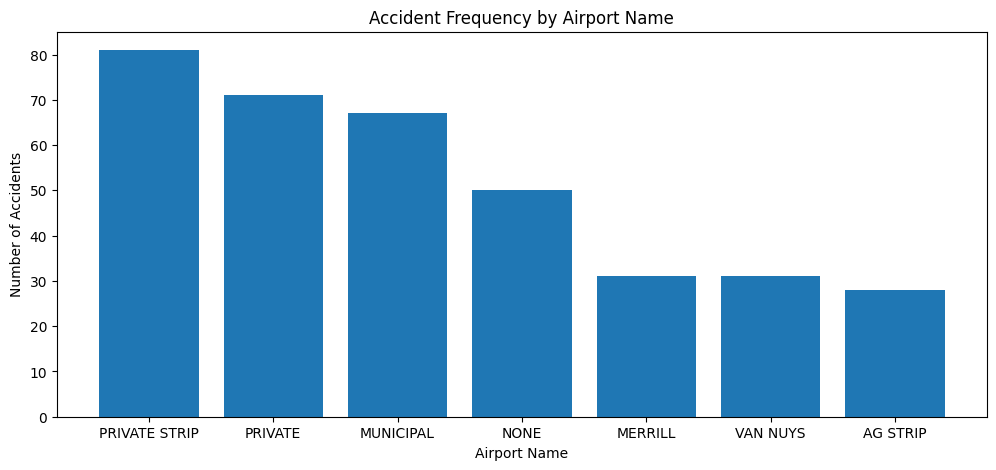

In [189]:
# Remove "UNKNOWN" entries from the dataset
airport_name = df2[df2["Airport_Name"] != "UNKNOWN"]["Airport_Name"].value_counts().head(7)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Plot bar chart
ax.bar(airport_name.index, airport_name.values)
ax.set_title("Accident Frequency by Airport Name")
ax.set_xlabel("Airport Name")
ax.set_ylabel("Number of Accidents")

# Show the plot
plt.show()



In [190]:
df2.columns

Index(['Investigation_Type', 'Event_Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport_Code', 'Airport_Name', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Event_Year'],
      dtype='object')

### comment:
 we have to create a figure that shows how accident frequency has evolved over the year for each country.
 link for material that will help me do just that: https://www.kaggle.com/code/fernandowolff/aviation-accident-eda-and-hypothesis-testing
 also :https://www.kaggle.com/code/michaelhaender/notebookbabfe3f42a/edit

##Introduction
For this analysis, we will use the dataset "Aviation Accident Database & Synopses, up to 2023" from Kaggle, provided by the National Transportation Safety Board (NTSB). This dataset contains comprehensive information about aviation accidents, including aircraft make and model, weather conditions,Injury severity,accident locations and more.

Our goal is to analyze accident patterns, aircraft reliability, and contributing risk factors in aviation incidents. We will generate data-driven insights to assist the new aviation division in identifying the safest aircrafts for purchase and determining the best strategies for fleet management.

